In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
df.duplicated('CustomerId').sum()

0

In [9]:
df = df.set_index('CustomerId')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [11]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':1}}, inplace=True)

In [13]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [17]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [18]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [19]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [21]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [23]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [24]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

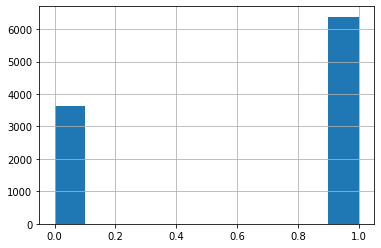

In [26]:
df['Zero Balance'].hist()

In [27]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     1             3759         3759    3759  3759    3759     3759   
      2             4204         4204    4204  4204    4204     4204   
1     1             1227         1227    1227  1227    1227     1227   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     1                     3759             3759              3759   
      2                     4204             4204              4204   
1     1                     1227             1227              1227   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     1                      3759          3759  
      2                      4204          4204  
1     1                      1227          1227  
      2                       810           810

In [28]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [29]:
X = df.drop(['Surname','Churn'],axis=1)

In [30]:
y = df['Churn']

In [31]:
X.shape, y.shape

((10000, 11), (10000,))

In [32]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

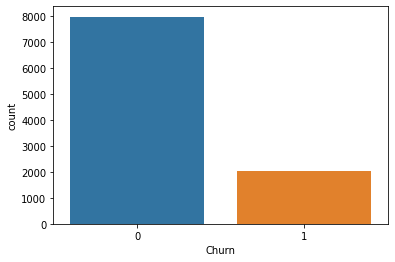

In [34]:
sns.countplot(x ="Churn", data = df);

In [40]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [41]:
rus = RandomUnderSampler(random_state =2529)

In [42]:
X_rus  , y_rus = rus.fit_resample(X,y)

In [43]:
X_rus.shape, y_rus.shape, X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [44]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [45]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

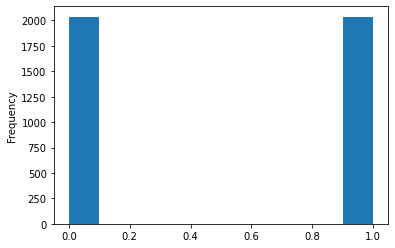

In [46]:
y_rus.plot(kind = 'hist')

In [47]:
from imblearn.over_sampling import RandomOverSampler

In [48]:
ros = RandomOverSampler(random_state=2529)

In [49]:
X_ros, y_ros = ros.fit_resample(X,y)

In [50]:
X_ros.shape, y_ros.shape, X.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [51]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [52]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

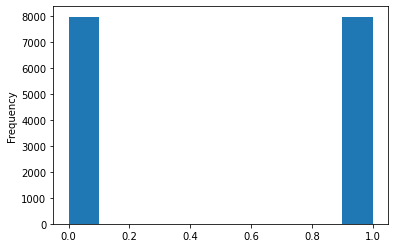

In [53]:
y_ros.plot(kind = 'hist')

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test , y_train, y_test = train_test_split( X, y , test_size =0.3, random_state = 2529)

In [61]:
X_train_rus, X_test_rus , y_train_rus, y_test_rus = train_test_split( X_rus, y_rus , test_size =0.3, random_state = 2529)

In [62]:
X_train_ros, X_test_ros,y_train_ros,y_test_ros = train_test_split(X_ros, y_ros, test_size = 0.3, random_state = 2529)

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc = StandardScaler()

In [65]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]= sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [69]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=  sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [70]:
X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]= sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [71]:
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=  sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [72]:
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]= sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [73]:
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=  sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [74]:
from sklearn.svm import SVC

In [75]:
svc = SVC()

In [76]:
svc.fit(X_train,y_train)

SVC()

In [77]:
y_pred = svc.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

In [79]:
confusion_matrix(y_test, y_pred)

array([[2386,   28],
       [ 442,  144]])

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2414
           1       0.84      0.25      0.38       586

    accuracy                           0.84      3000
   macro avg       0.84      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



In [130]:
from sklearn.model_selection import GridSearchCV

In [133]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [132]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [134]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [135]:
grid_predictions = grid.predict(X_test)

In [136]:
confusion_matrix(y_test,grid_predictions)

array([[2122,  292],
       [ 343,  243]])

In [137]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2414
           1       0.45      0.41      0.43       586

    accuracy                           0.79      3000
   macro avg       0.66      0.65      0.65      3000
weighted avg       0.78      0.79      0.78      3000



In [138]:
svc_rus = SVC()

In [139]:
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [140]:
y_pred_rus = svc_rus.predict(X_test_rus)

In [141]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[465, 162],
       [168, 428]])

In [142]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       627
           1       0.73      0.72      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [143]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [144]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [145]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [146]:
grid_predictions_rus = grid.predict(X_test_rus)

In [148]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[607,  20],
       [114, 482]])

In [149]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       627
           1       0.96      0.81      0.88       596

    accuracy                           0.89      1223
   macro avg       0.90      0.89      0.89      1223
weighted avg       0.90      0.89      0.89      1223



In [150]:
svc_ros = SVC()

In [151]:
svc_ros.fit(X_train_ros, y_train_ros)

SVC()

In [152]:
y_pred_ros = svc_ros.predict(X_test_ros)

In [153]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1805,  574],
       [ 635, 1764]])

In [154]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      2379
           1       0.75      0.74      0.74      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



In [155]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [156]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [157]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [158]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [159]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2032,  347],
       [  76, 2323]])

In [160]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.96      0.85      0.91      2379
           1       0.87      0.97      0.92      2399

    accuracy                           0.91      4778
   macro avg       0.92      0.91      0.91      4778
weighted avg       0.92      0.91      0.91      4778

